# Optional: Histogramme 

## Lernziele

```{admonition} Lernziele
:class: hint
* Sie wissen, was ein **Histogramm** ist.
* Sie können mit der Methode **.hist()** ein Histogramm erzeugen.
* Sie wissen, dass die Einteilung des Intervalls in die Behälter **Bin**
  kritisch ist und daher sehr sorgfältig gewählt werden muss.
```

## Notenspiegel ist ein Histogramm

Das erste Histogramm, das Ihnen wahrscheinlich begegnet ist, ist der
Notenspiegel in der Schule gewesen. Für jedes Merkmal (hier = Note) des
Datensatzes (hier = Klasse) wird die Anzahl der Schülerinnen und Schüler
angegeben, die diese Note erreicht haben. Eine typische Klassenarbeit könnte
beispielsweise so aussehen:

|1 | 2 | 3 | 4 | 5 | 6 |
|---|---|---|---|---| --- |
| 2 | 4  | 8  | 6  | 3  | 1 |

Ein Histogramm ist eine Visualisierung einer solchen Tabelle. Dabei werden in
der Regel Balken benutzt. Auf der x-Achse sind also die Merkmale aufgetragen und
auf der y-Achse finden wir die Anzahl der Merkmale in dem Datensatz. Die Anzahl
kann dabei in absoluten Zahlen angegeben werden oder in relativen (Prozent).  

So sieht das Histogramm des Notenspiegels aus:

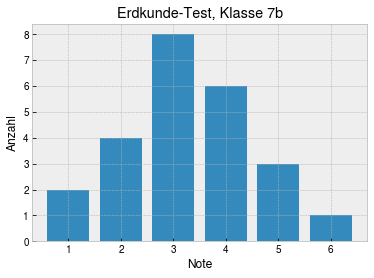

In [1]:
import matplotlib.pylab as plt
plt.style.use('bmh')
plt.rcParams['font.family'] = ['TeX Gyre Heros', 'sans-serif']
import numpy as np

# data
x = np.arange(1,7)
y = np.array([2,4,8,6,3,1])

# plot
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_xlabel('Note')
ax.set_ylabel('Anzahl')
ax.set_title('Erdkunde-Test, Klasse 7b');

Diese Analysemethode wird sehr häufig eingesetzt. Daher stellen alle drei Module
[Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html),
[Numpy](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)
und
[Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)
Methoden für Histogramme zur Verfügung. Da wir ohnehin das Histogramm
visualisieren wollen, überspringen wir das Numpy-Histogramm und wenden uns
gleich dem Matplotlib-Histogramm zu, das auch die Basis für das
Pandas-Histogramm bildet.

Um die Optionen des Histogramms kennenzulernen, erzeugen wir zunächst eine sehr
kleine Klasse mit 10 Schülerinnen und Schülern und würfeln ihre Noten zufällig
aus. Und nein, in der Klausur werde ich nicht würfeln ;-)

In [2]:
# draw randomly grades
from random import randint, seed
seed(3)
grades = [randint(1, 6) for _ in range(10)]

print('gewürfelte Noten: ', grades)

gewürfelte Noten:  [2, 5, 5, 2, 3, 5, 4, 6, 5, 1]


Danach verwenden wir die Methode ``.hist()``, um ein Histogramm zu zeichnen.

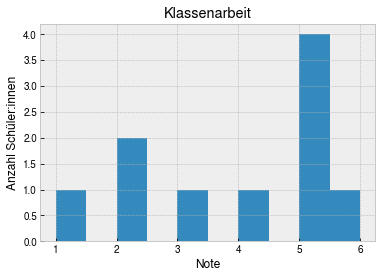

In [3]:
# plot histogram
fig, ax = plt.subplots()
ax.hist(grades)
ax.set_xlabel('Note')
ax.set_ylabel('Anzahl Schüler:innen')
ax.set_title('Klassenarbeit');

Die Darstellung sieht etwas ungewohnt aus. Mit den Optionen ``bins=``,
``align=`` und ``rwidth=`` wirkt das Histogramm gleich ein wenig vertrauter.

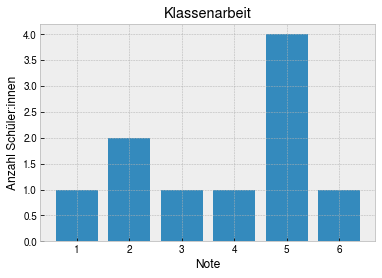

In [4]:
# generate custom bins
my_bins = [1,2,3,4,5,6,7]

# plot improved histogram
fig, ax = plt.subplots()
ax.hist(grades, bins=my_bins, align='left', rwidth=0.8)
ax.set_xlabel('Note')
ax.set_ylabel('Anzahl Schüler:innen')
ax.set_title('Klassenarbeit');

Die Optionen sind ausführlich in der
[Matplotlib-Dokumentation/hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
dokumentiert. Kurz zusammengefasst bedeuten die drei Optionen

* *bins=*: Wenn `bins` ein Integer ist, wird der kleinste x- und der größte
  x-Wert ermittelt. Danach werden soviele Behälter (also Abschnitte in diesem
  Intervall zwischen kleinsten und größtem x-Wert) gebildet, wie dort angegeben.
  Ist jedoch `bins` eine Liste von Zahlen, z.B. [1,2,3,4], so werden als
  Behälter Intervalle zwischen den aufeinanderfolgenden Werten gebildet. In
  diesem Fall wäre der 1. Behälter das Intervall [1,2), der 2. Behälter das
  Intervall [2,3), der 3. Behälter [3,4]. Bei vier Zahlen in der Liste erhalten
  wir drei Intervalle, wobei die ersten Intervalle immer rechts offen sind und
  nur das letzte Intervall ist geschlossen.   
* *align=*: Die Option `align` kann die Werte 'left', 'mid' und 'right'
  annehmen. Verwendet man die Option nicht, so wird automatisch `align='mid'`
  benutzt. Mit dieser Option wird die horizontale Ausrichtung der Balken
  gesteuert.
* *rwidth=*: Mit der dritten Option `rwidth` kann die Breite der Balken
  eingestellt werden. Die Breite wird dabei relativ als Float angegeben.
  `rwidth=0.9` würde einen Balken ergeben, der 90 % Breite zum Standard hat.

## Wahl der Bins ist entscheidend zur Interpretation der Daten

Nicht immer ist die Klasseneinteilung, also die Bins, vorher schon klar.
Beispielsweise könnten wir die Körpergröße der teilnehmenden Studierenden dieser
Vorlesung analysieren wollen. Und dabei sind wir bei der Einteilung in Bins
frei. Beispielsweise könnten wir zwei Bins, nämlich $< 120~cm$ und $\geq 120~cm$
wählen. So richtig viel verrät uns diese Aufteilung über die Verteilung der
Körpergröße jedoch nicht, denn wahrscheinlich sind alle in der letzten Bin. Aber
stattdessen Millimeterschritte zu wählen, wäre zuviel des Guten. Daher
beschäftigen wir uns als Nächstes mit der Wahl der Bin-Größe im Verhältnis zu
den gegebenen Daten.

Im Folgenden erzeugen wir zunächst einmal 1000 normalverteilte Zufallszahlen mit
Mittelwert 0 und Standardabweichung 1. Bei (0,1)-normalverteilten Zufallszahlen
wissen wir, dass
* 68.27 % aller Zahlen zwischen -1 und 1 liegen,
* 95.45 % aller Zahlen zwischen -2 und 2 liegen und
* 99.73 % aller Zahlen zwischen -3 und 3 liegen. 

Wenn wir jetzt 100 Bins wählen, wird eine Bin ca. 0.06 breit sein. Wir tragen
jetzt die Anzahl der x, die in eine Bin fällt, im Histogram auf:

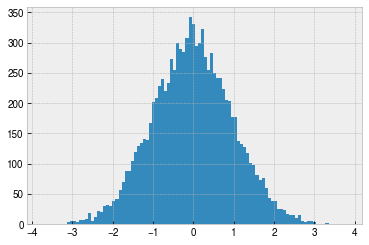

In [5]:
# fix random seed and draw N = 10000 normally distributed random numbers
N = 10000
rand = np.random.RandomState(0)
x = rand.randn(N)

# plot histogram with 100 bins
fig, ax = plt.subplots()
ax.hist(x, bins=100);

Ändern Sie bitte in der folgenden Code-Zelle die Anzahl der Zufallszahlen.
Probieren Sie z.B. N = 10, 100, 1000 oder 100000000 aus. Ab wann erkennen Sie
die Gauß-Kurve? Gibt es eine Anzahl N von Punkten, ab der sich die Kurve nicht
mehr ändert?

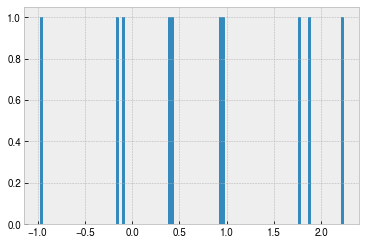

In [6]:
# variation of N
N = 10
rand = np.random.RandomState(0)
x = rand.randn(N)

# plot histogram with 100 bins
fig, ax = plt.subplots()
ax.hist(x, bins=100);

In der Praxis ist es nicht so einfach, die Anzahl der Daten zu vergrößern. Daher
probieren wir als nächstes das Umgekehrte. Wir bleiben bei $N=1000$
Zufallszahlen, aber spielen mit der Anzahl der Bins und der Bingröße herum.
Verändern Sie die Anzahl der Bins von 6, 10, 50, 100, 250, 1000, 10000. Was
beobachten Sie?

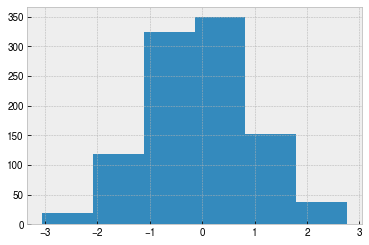

In [7]:
# fixed N = 1000
N = 1000
rand = np.random.RandomState(0)
x = rand.randn(N)

# variation of bins 
number_bins = 6
fig, ax = plt.subplots()
ax.hist(x, bins=number_bins);

## Zusammenfassung 

Bei einem Histogramm werden Daten in Klassen eingeteilt und ihre Anzahl
bestimmt. Die Wahl der Klassen ist dabei kritisch und muss sorgsam erfolgen.